In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
#load preprocessed data
preprocessed_data = pd.read_csv('Gaza_before_conflict_preprocessed.csv')
preprocessed_data.head()

,article_title,author,published_time,article_text
0,First Saudi ambassador to Palestine arrives in...,By Xinhua,"Published: Sep 27, 2023 09:58 AM",Saudi Arabia ambassador to Palestine Naif bin ...
1,"1,100 Gazan kidney patients facing drug shorta...",By Xinhua,"Published: Sep 21, 2023 11:02 AM",A young Palestine patient receives treatment a...
2,Mideast in Pictures: It's back-to-school day i...,By Xinhua,"Published: Aug 27, 2023 01:21 PM",Palestine students are pictured in a classroom...
3,Palestinians injured in clashes with Israeli s...,By Xinhua,"Published: Aug 22, 2023 11:05 AM",Palestine protesters hurl stones at Israel sol...
4,Palestinian students participate in digital ex...,By Xinhua,"Published: Aug 17, 2023 10:13 AM",A Palestine student participates in a digital ...


In [ ]:
#load top 50 words for each entity type from the NER results
ner_results = pd.read_excel('Gaza_Before_TopWords.xlsx')
ner_results.head()

,Entity Type,Word,Count
0,LOC,Palestine,187
1,LOC,Gaza,165
2,LOC,Israel,142
3,LOC,China,39
4,LOC,Saudi Arabia,21


In [ ]:
#filtering top 10 entities for each type
#top_5 = ner_results.groupby('Entity Type').head(5)
#top_5.head()

In [ ]:
#combine top 10 into single list of entities
entities = ['Palestine',
 'Gaza',
 'Israel',
 'China',
 'Saudi Arabia',
 'Al-Sudairi',
 'Rizek Abdel Jawad',
 'Mahmoud Abbas',
 'Naif bin Bandar Al',
 'Wang Wenbin',
 'Xinhua',
 'Palestinian Islamic Jihad',
 'IDF',
 'UN',
 'Health Ministry',
 'Roman',
 'Eid Al-Adha',
 'Gazan',
 'Palestinian Nakba',
 'Hamas']
entities

['Palestine',
 'Gaza',
 'Israel',
 'China',
 'Saudi Arabia',
 'Al-Sudairi',
 'Rizek Abdel Jawad',
 'Mahmoud Abbas',
 'Naif bin Bandar Al',
 'Wang Wenbin',
 'Xinhua',
 'Palestinian Islamic Jihad',
 'IDF',
 'UN',
 'Health Ministry',
 'Roman',
 'Eid Al-Adha',
 'Gazan',
 'Palestinian Nakba',
 'Hamas']

## Relationship with co-occurence based in same sentence using networkx

In [ ]:
#initiliazise graph
G = nx.Graph()

#add nodes for each entity
for entity in entities:
    G.add_node(entity)

In [ ]:
co_occurrence = defaultdict(int)

In [ ]:
for article in preprocessed_data['article_text']:
    #process the article with SpaCy to get sentences
    doc = nlp(article)
    sentences = [sent.text for sent in doc.sents]
    #print(sentences)

    #iterate through each sentence in the article
    for sentence in sentences:
        present_entities = [entity for entity in entities if entity in sentence]
        #print(present_entities)
        for i in range(len(present_entities)):
            for j in range(i + 1, len(present_entities)):
                co_occurrence[(present_entities[i], present_entities[j])] += 1
                #print(co_occurrence)

In [ ]:
#add edges with weights to the graph
for (entity1, entity2), weight in co_occurrence.items():
    G.add_edge(entity1, entity2, weight=weight)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


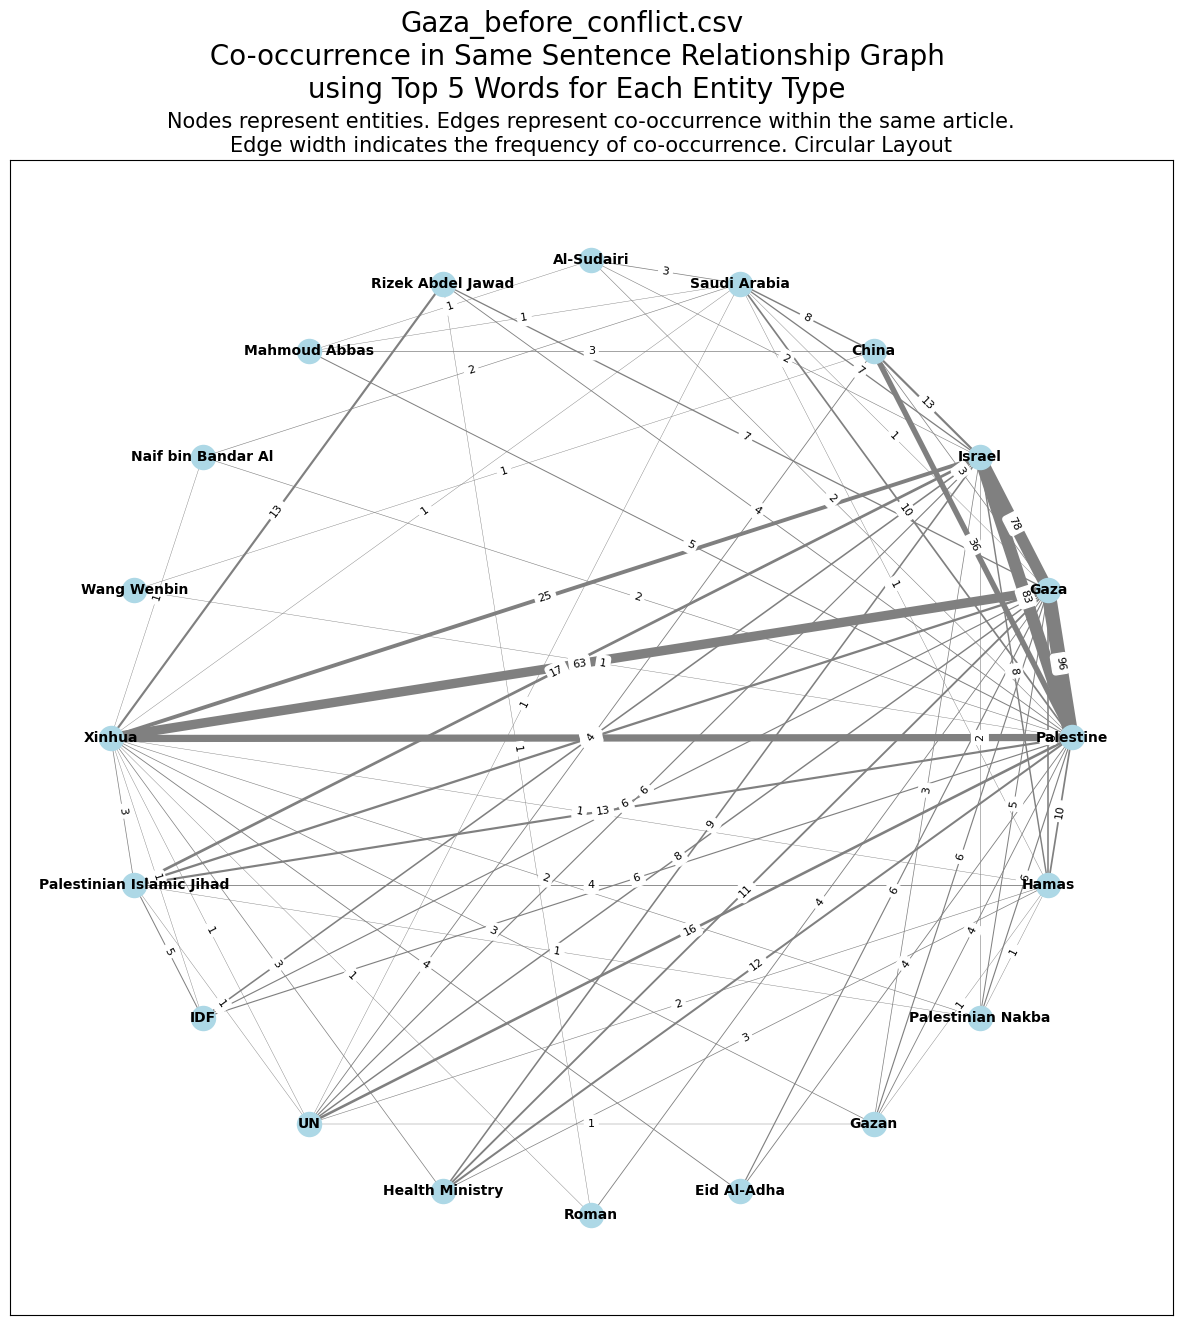

In [ ]:
#draw the graph
plt.figure(figsize=(15, 15))
pos = nx.circular_layout(G)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

max_weight = max(weights)
min_width = 0.2
normalized_weights = [(weight / max_weight * 10) + min_width for weight in weights]

nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edgelist=edges, width=normalized_weights, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
#nx.draw(G, pos, with_labels=True, node_size=300, node_color='lightblue', edge_color='gray', font_size=10, font_weight='bold', width=weights)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

plt.suptitle("Gaza_before_conflict.csv\n Co-occurrence in Same Sentence Relationship Graph\n using Top 5 Words for Each Entity Type", fontsize=20)
plt.title("Nodes represent entities. Edges represent co-occurrence within the same article.\nEdge width indicates the frequency of co-occurrence. Circular Layout", fontsize=15)
plt.show()

In [ ]:
#edges

---
## Relationship with co-occurence based in same article using networkx

In [ ]:
#initialize graph
G = nx.Graph()

#add nodes for each entity
for entity in entities:
    G.add_node(entity)

In [ ]:
co_occurrence = defaultdict(int)

#iterate through each article in the preprocessed dataset
for article in preprocessed_data['article_text']:
    #find all entities present in the article
    present_entities = [entity for entity in entities if entity in article]
    #print(present_entities)

    #track co-occurrences within the article
    for i in range(len(present_entities)):
        for j in range(i + 1, len(present_entities)):
            co_occurrence[(present_entities[i], present_entities[j])] += 1
            #print(co_occurrence)

In [ ]:
#add edges with weights to the graph
for (entity1, entity2), weight in co_occurrence.items():
    G.add_edge(entity1, entity2, weight=weight)

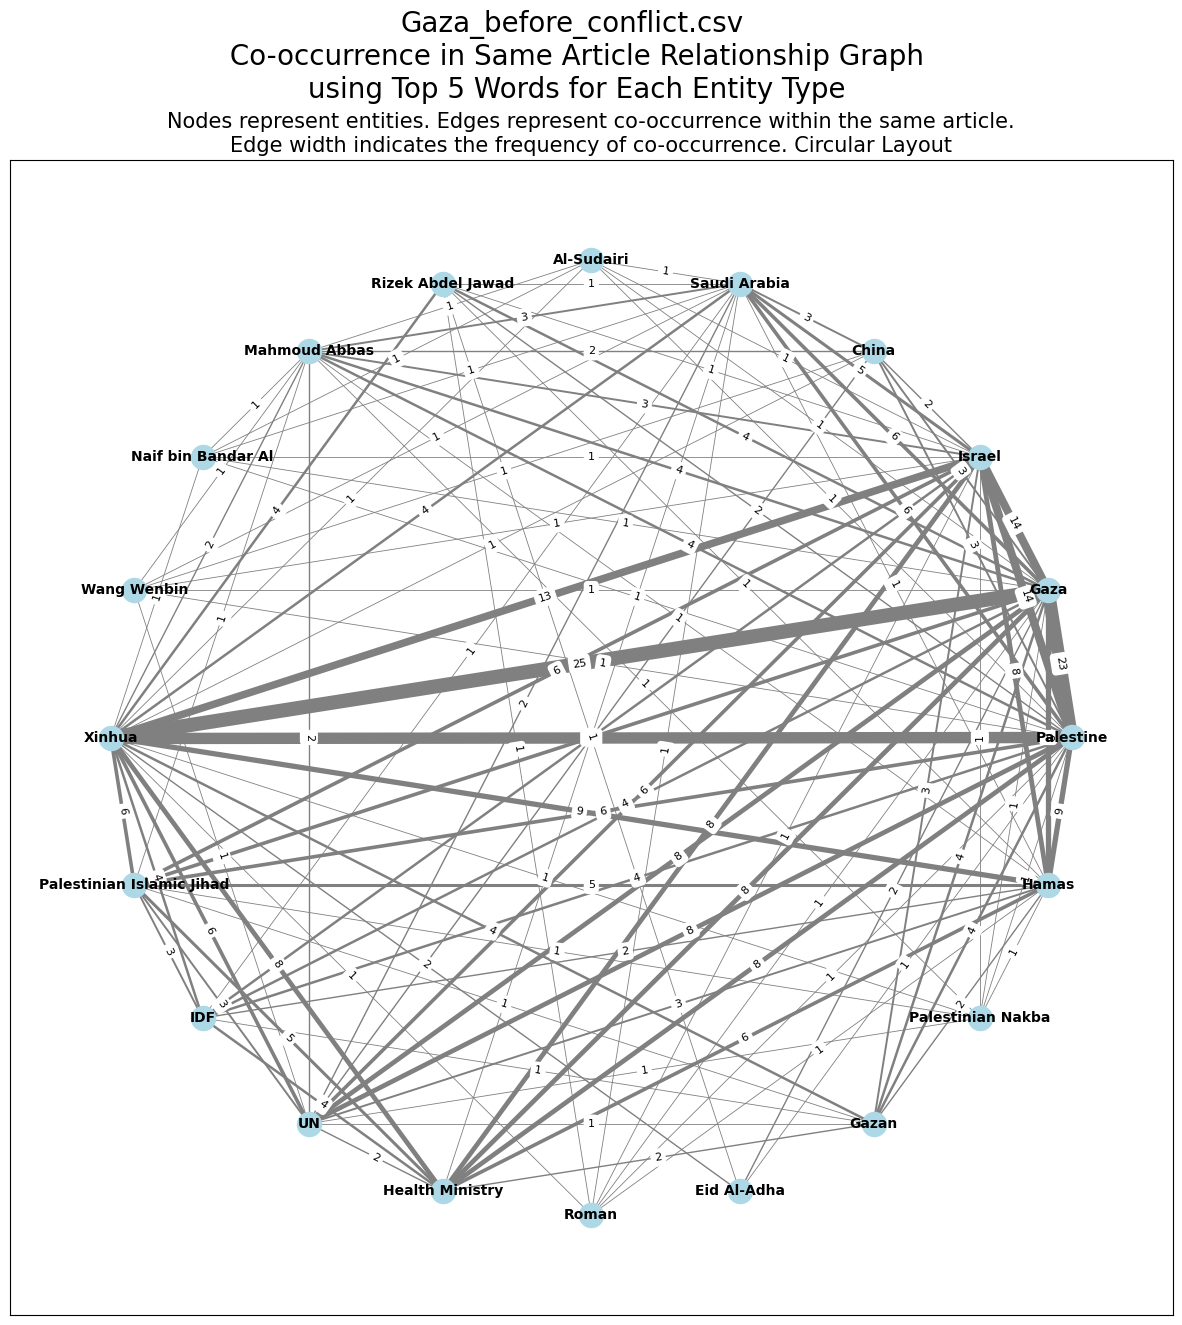

In [ ]:
#draw the graph
plt.figure(figsize=(15, 15))
pos = nx.circular_layout(G)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

max_weight = max(weights)
min_width = 0.2
normalized_weights = [(weight / max_weight * 10) + min_width for weight in weights]

nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edgelist=edges, width=normalized_weights, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
#nx.draw(G, pos, with_labels=True, node_size=300, node_color='lightblue', edge_color='gray', font_size=10, font_weight='bold', width=weights)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

plt.suptitle("Gaza_before_conflict.csv\n Co-occurrence in Same Article Relationship Graph\n using Top 5 Words for Each Entity Type", fontsize=20)
plt.title("Nodes represent entities. Edges represent co-occurrence within the same article.\nEdge width indicates the frequency of co-occurrence. Circular Layout", fontsize=15)
plt.show()

---
## Relationship with co-occurence based in same sentence using hypergraph

In [ ]:
pip install hypernetx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 579.3/579.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 46.4 MB/s eta 0:00:00
  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorator-4.4.2:
      Successfully uninstalled decorator-4.4.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.

In [ ]:
import hypernetx as hnx
import matplotlib.pyplot as plt

In [ ]:
entities = list(set(entity.lower() for entity in entities_of_interest))
entities

['palestinian islamic jihad',
 'gaza',
 'china',
 'idf',
 'roman',
 'un',
 'palestine',
 'mahmoud abbas',
 'israel',
 'hamas',
 'rizek abdel jawad',
 'gazan',
 'xinhua',
 'wang wenbin',
 'health ministry',
 'al-sudairi',
 'eid al-adha',
 'palestinian nakba',
 'saudi arabia',
 'naif bin bandar al']

In [ ]:
#function to find co-occurrences within sentences
def find_cooccurrences(text, entities):
    doc = nlp(text)
    co_occurrences = []

    for sent in doc.sents:
        sent_entities = [entity for entity in entities if entity in sent.text.lower()]
        if len(sent_entities) > 1:
            co_occurrences.append(tuple(sent_entities))

    return co_occurrences

In [ ]:
hyperedges = []

for article in preprocessed_data['article_text']:
    co_occurrences = find_cooccurrences(article, entities)
    hyperedges.extend(co_occurrences)

In [ ]:
hyperedges

[('palestine', 'xinhua', 'saudi arabia', 'naif bin bandar al'),
 ('palestine', 'saudi arabia', 'naif bin bandar al'),
 ('palestine', 'mahmoud abbas', 'al-sudairi'),
 ('israel', 'al-sudairi', 'saudi arabia'),
 ('un', 'palestine', 'al-sudairi', 'saudi arabia'),
 ('un', 'palestine', 'saudi arabia'),
 ('israel', 'al-sudairi', 'saudi arabia'),
 ('un', 'saudi arabia'),
 ('palestine', 'israel', 'saudi arabia'),
 ('gaza', 'palestine', 'israel'),
 ('un', 'saudi arabia'),
 ('gaza', 'un', 'palestine'),
 ('un', 'palestine', 'hamas', 'health ministry'),
 ('gaza', 'un', 'palestine'),
 ('un', 'palestine', 'hamas', 'xinhua', 'health ministry'),
 ('gaza', 'health ministry'),
 ('gaza', 'un'),
 ('gaza', 'israel', 'hamas', 'gazan'),
 ('gaza', 'palestine'),
 ('gaza', 'xinhua'),
 ('gaza', 'un', 'palestine', 'israel', 'gazan'),
 ('gaza', 'palestine'),
 ('gaza', 'palestine', 'xinhua'),
 ('gaza', 'palestine', 'xinhua'),
 ('palestine', 'israel'),
 ('gaza', 'palestine', 'israel', 'xinhua'),
 ('palestine', 'israe

In [ ]:
#remove duplicate hyperedges
#hyperedges = list(map(list, set(map(tuple, hyperedges))))
#hyperedges

In [ ]:
#count the frequency of each hyperedge
hyperedge_counter = Counter(map(tuple, hyperedges))
hyperedge_counter

Counter({('palestine', 'xinhua', 'saudi arabia', 'naif bin bandar al'): 1,
         ('palestine', 'saudi arabia', 'naif bin bandar al'): 1,
         ('palestine', 'mahmoud abbas', 'al-sudairi'): 1,
         ('israel', 'al-sudairi', 'saudi arabia'): 2,
         ('un', 'palestine', 'al-sudairi', 'saudi arabia'): 1,
         ('un', 'palestine', 'saudi arabia'): 1,
         ('un', 'saudi arabia'): 3,
         ('palestine', 'israel', 'saudi arabia'): 1,
         ('gaza', 'palestine', 'israel'): 12,
         ('gaza', 'un', 'palestine'): 10,
         ('un', 'palestine', 'hamas', 'health ministry'): 1,
         ('un', 'palestine', 'hamas', 'xinhua', 'health ministry'): 1,
         ('gaza', 'health ministry'): 1,
         ('gaza', 'un'): 9,
         ('gaza', 'israel', 'hamas', 'gazan'): 1,
         ('gaza', 'palestine'): 6,
         ('gaza', 'xinhua'): 4,
         ('gaza', 'un', 'palestine', 'israel', 'gazan'): 1,
         ('gaza', 'palestine', 'xinhua'): 8,
         ('palestine', 'israel'): 9,

In [ ]:
filtered_hyperedges = [list(edge) for edge, count in hyperedge_counter.items() if count > 2]
filtered_hyperedges

[['un', 'saudi arabia'],
 ['gaza', 'palestine', 'israel'],
 ['gaza', 'un', 'palestine'],
 ['gaza', 'un'],
 ['gaza', 'palestine'],
 ['gaza', 'xinhua'],
 ['gaza', 'palestine', 'xinhua'],
 ['palestine', 'israel'],
 ['gaza', 'palestine', 'israel', 'xinhua'],
 ['un', 'palestine', 'israel'],
 ['gaza', 'un', 'palestine', 'xinhua'],
 ['gaza', 'roman', 'un'],
 ['rizek abdel jawad', 'xinhua'],
 ['gaza', 'palestine', 'rizek abdel jawad', 'xinhua'],
 ['gaza', 'un', 'xinhua'],
 ['gaza', 'un', 'palestine', 'xinhua', 'eid al-adha'],
 ['gaza', 'un', 'palestine', 'israel', 'xinhua'],
 ['gaza', 'un', 'palestine', 'israel'],
 ['un', 'israel'],
 ['china', 'palestine'],
 ['china', 'un', 'palestine'],
 ['un', 'palestine'],
 ['gaza', 'israel'],
 ['china', 'un', 'palestine', 'israel'],
 ['china', 'un'],
 ['gaza', 'palestine', 'gazan', 'xinhua'],
 ['gaza', 'israel', 'xinhua'],
 ['gaza', 'palestine', 'israel', 'health ministry'],
 ['palestinian islamic jihad', 'gaza', 'idf', 'un', 'palestine', 'israel'],
 ['gaz

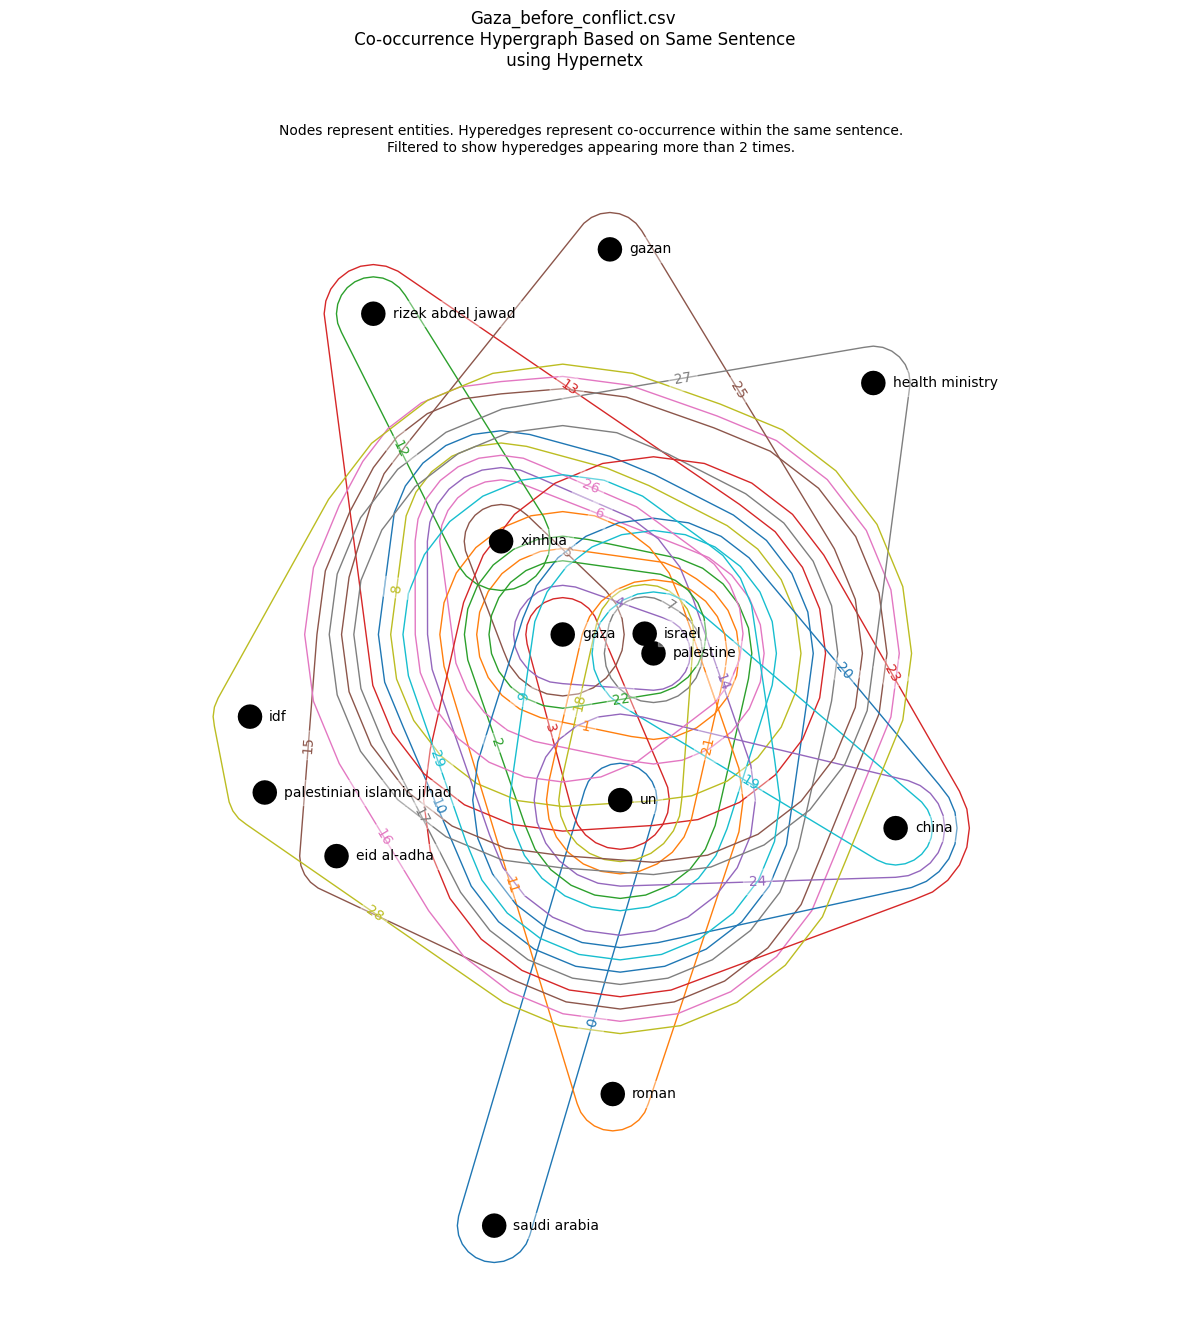

In [ ]:
H = hnx.Hypergraph(filtered_hyperedges)

plt.figure(figsize=(15, 15))
hnx.draw(H, with_node_labels=True, with_edge_labels=True)
plt.suptitle("Gaza_before_conflict.csv\n Co-occurrence Hypergraph Based on Same Sentence\n using Hypernetx")
plt.title("Nodes represent entities. Hyperedges represent co-occurrence within the same sentence.\nFiltered to show hyperedges appearing more than 2 times.", fontsize=10)
plt.show()

---
## Relationship with co-occurence based in same article using hypergraph

In [ ]:
def find_cooccurrences(text, entities):
    doc = nlp(text)
    doc_text = doc.text.lower()
    co_occurrences = []

    article_entities = [entity for entity in entities if entity in doc_text]
    if len(article_entities) > 1:
        co_occurrences.append(tuple(article_entities))

    return co_occurrences

In [ ]:
hyperedges = []

for article in preprocessed_data['article_text']:
    co_occurrences = find_cooccurrences(article, entities)
    hyperedges.extend(co_occurrences)

In [ ]:
hyperedges

[('gaza',
  'un',
  'palestine',
  'mahmoud abbas',
  'israel',
  'xinhua',
  'al-sudairi',
  'saudi arabia',
  'naif bin bandar al'),
 ('gaza',
  'un',
  'palestine',
  'israel',
  'hamas',
  'gazan',
  'xinhua',
  'health ministry'),
 ('gaza', 'un', 'palestine', 'israel', 'gazan', 'xinhua'),
 ('gaza', 'un', 'palestine', 'israel', 'hamas', 'xinhua', 'health ministry'),
 ('gaza', 'un', 'palestine', 'xinhua'),
 ('gaza', 'xinhua'),
 ('gaza', 'palestine', 'xinhua'),
 ('gaza',
  'roman',
  'un',
  'palestine',
  'israel',
  'hamas',
  'rizek abdel jawad',
  'xinhua',
  'saudi arabia'),
 ('gaza', 'un', 'palestine', 'xinhua', 'eid al-adha'),
 ('gaza', 'un', 'rizek abdel jawad', 'xinhua'),
 ('gaza', 'un', 'rizek abdel jawad', 'xinhua', 'eid al-adha'),
 ('gaza',
  'idf',
  'un',
  'palestine',
  'israel',
  'xinhua',
  'health ministry',
  'saudi arabia'),
 ('gaza', 'china', 'un', 'palestine', 'mahmoud abbas', 'saudi arabia'),
 ('gaza',
  'china',
  'un',
  'palestine',
  'mahmoud abbas',
  'i

In [ ]:
hyperedge_counter = Counter(map(tuple, hyperedges))
hyperedge_counter

Counter({('gaza',
          'un',
          'palestine',
          'mahmoud abbas',
          'israel',
          'xinhua',
          'al-sudairi',
          'saudi arabia',
          'naif bin bandar al'): 1,
         ('gaza',
          'un',
          'palestine',
          'israel',
          'hamas',
          'gazan',
          'xinhua',
          'health ministry'): 1,
         ('gaza', 'un', 'palestine', 'israel', 'gazan', 'xinhua'): 1,
         ('gaza',
          'un',
          'palestine',
          'israel',
          'hamas',
          'xinhua',
          'health ministry'): 1,
         ('gaza', 'un', 'palestine', 'xinhua'): 2,
         ('gaza', 'xinhua'): 2,
         ('gaza', 'palestine', 'xinhua'): 2,
         ('gaza',
          'roman',
          'un',
          'palestine',
          'israel',
          'hamas',
          'rizek abdel jawad',
          'xinhua',
          'saudi arabia'): 1,
         ('gaza', 'un', 'palestine', 'xinhua', 'eid al-adha'): 1,
         ('ga

In [ ]:
filtered_hyperedges = [list(edge) for edge, count in hyperedge_counter.items() if count > 0]
filtered_hyperedges

[['gaza',
  'un',
  'palestine',
  'mahmoud abbas',
  'israel',
  'xinhua',
  'al-sudairi',
  'saudi arabia',
  'naif bin bandar al'],
 ['gaza',
  'un',
  'palestine',
  'israel',
  'hamas',
  'gazan',
  'xinhua',
  'health ministry'],
 ['gaza', 'un', 'palestine', 'israel', 'gazan', 'xinhua'],
 ['gaza', 'un', 'palestine', 'israel', 'hamas', 'xinhua', 'health ministry'],
 ['gaza', 'un', 'palestine', 'xinhua'],
 ['gaza', 'xinhua'],
 ['gaza', 'palestine', 'xinhua'],
 ['gaza',
  'roman',
  'un',
  'palestine',
  'israel',
  'hamas',
  'rizek abdel jawad',
  'xinhua',
  'saudi arabia'],
 ['gaza', 'un', 'palestine', 'xinhua', 'eid al-adha'],
 ['gaza', 'un', 'rizek abdel jawad', 'xinhua'],
 ['gaza', 'un', 'rizek abdel jawad', 'xinhua', 'eid al-adha'],
 ['gaza',
  'idf',
  'un',
  'palestine',
  'israel',
  'xinhua',
  'health ministry',
  'saudi arabia'],
 ['gaza', 'china', 'un', 'palestine', 'mahmoud abbas', 'saudi arabia'],
 ['gaza',
  'china',
  'un',
  'palestine',
  'mahmoud abbas',
  'i

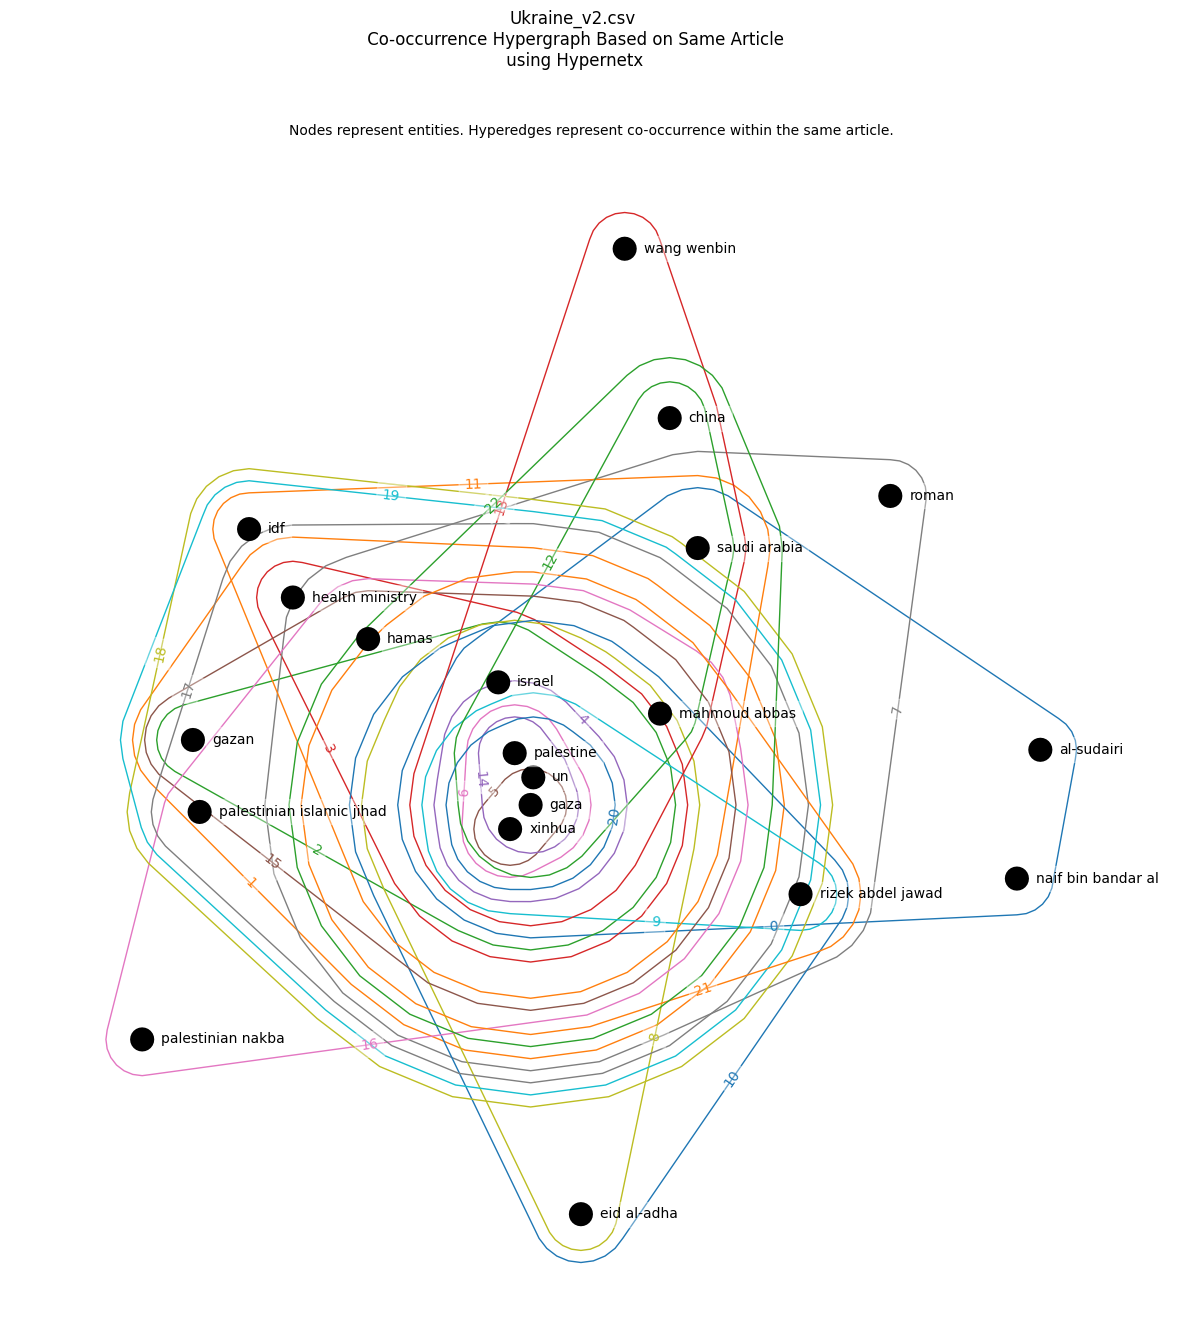

In [ ]:
H = hnx.Hypergraph(filtered_hyperedges)

plt.figure(figsize=(15, 15))
hnx.draw(H, with_node_labels=True, with_edge_labels=True)
plt.suptitle("Ukraine_v2.csv\n Co-occurrence Hypergraph Based on Same Article\n using Hypernetx")
plt.title("Nodes represent entities. Hyperedges represent co-occurrence within the same article.\n", fontsize=10)
plt.show()